In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Matrix

from LAPM.linear_autonomous_pool_model import LinearAutonomousPoolModel as LAPM

In [111]:
p, xi = symbols("p, xi")

#u = Matrix(2, 1, [1, 0])
#B = xi* Matrix([[-1, 0], [1-1/p, -1]])

u = Matrix(2, 1, [1-1/p, 1/p])
B = xi* Matrix([[-1, 0], [0, -0.01]])

In [112]:
u

Matrix([
[1 - 1/p],
[    1/p]])

In [113]:
B

Matrix([
[-xi,        0],
[  0, -0.01*xi]])

In [114]:
m = LAPM(u, B)
m.xss

Matrix([
[(1 - 1/p)/xi],
[100.0/(p*xi)]])

In [115]:
ET = m.T_expected_value
HP = m.entropy_per_cycle

In [127]:
xis = np.arange(0.1, 20, 0.1)
p_val = 2

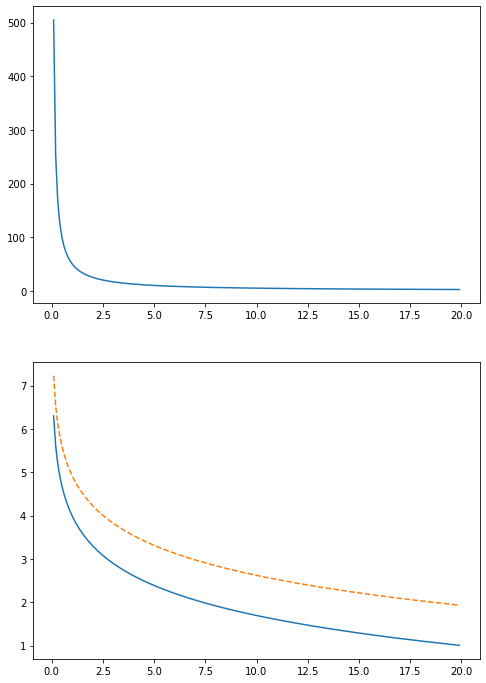

In [128]:
fig, axes = plt.subplots(figsize=(8, 6*2), nrows=2)

axes[0].plot(xis, [ET.subs({xi: x, p: p_val}) for x in xis])
axes[1].plot(xis, [HP.subs({xi: x, p: p_val}) for x in xis])
axes[1].plot(xis, [1-np.log(1/float(ET.subs({xi: x, p: p_val}))) for x in xis], ls="--")